In [1]:
import tensorflow as tf
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = 'gender_dataset_face/'  #dataset
classes = ['man','woman']

In [3]:
img_size = 150  
training_data = []

In [4]:
def create_train():
    for category in classes:
        path = os.path.join(data_dir, category)
        class_num = classes.index(category)  #0 or 1 (labels)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [5]:
create_train()

In [6]:
print(len(training_data))

2307


In [7]:
print(training_data)

[[array([[[ 21,  40,  60],
        [ 20,  39,  58],
        [ 19,  38,  55],
        ...,
        [177, 188, 194],
        [230, 239, 242],
        [247, 254, 255]],

       [[ 15,  35,  53],
        [ 15,  35,  53],
        [ 20,  39,  57],
        ...,
        [130, 141, 148],
        [196, 205, 211],
        [241, 246, 251]],

       [[ 12,  32,  48],
        [ 27,  47,  63],
        [ 25,  44,  61],
        ...,
        [ 98, 110, 118],
        [157, 167, 173],
        [227, 233, 239]],

       ...,

       [[253, 255, 255],
        [253, 255, 255],
        [254, 255, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 255, 255],
        [253, 255, 255],
        [254, 255, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[252, 254, 254],
        [253, 255, 255],
        [254, 255, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255

In [8]:
#shuffling training data to prevent overfitting
import random
random.shuffle(training_data)

In [9]:
#training_data list contains both img and labels, so we now seperate these 2 into 2 seperate lists
X = []  #data
y = []  #labels

for features,label in training_data:
    X.append(features)
    y.append(label)

In [10]:
# pre-processing
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

#normalizing the data:
X = X/255.0

In [11]:
# split dataset for training and validation
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [13]:
print(trainY)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [15]:
#Initializing CNN
cnn=tf.keras.models.Sequential()

In [16]:
#Adding First Convolution Layer and applying Max Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
#2nd Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
#3rd Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [21]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(2, activation = "sigmoid"))

In [23]:
#Compiling CNN
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [25]:
epochs = 10
lr = 1e-3
batch_size = 64

In [26]:
H = cnn.fit(datagen.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

Epoch 1/10
28/28 [==============================] - 49s 2s/step - loss: 0.6671 - accuracy: 0.6261 - val_loss: 0.5472 - val_accuracy: 0.7684
Epoch 2/10
28/28 [==============================] - 47s 2s/step - loss: 0.4954 - accuracy: 0.7591 - val_loss: 0.3812 - val_accuracy: 0.8485
Epoch 3/10
28/28 [==============================] - 48s 2s/step - loss: 0.3853 - accuracy: 0.8360 - val_loss: 0.3167 - val_accuracy: 0.8593
Epoch 4/10
28/28 [==============================] - 45s 2s/step - loss: 0.3480 - accuracy: 0.8433 - val_loss: 0.2626 - val_accuracy: 0.9004
Epoch 5/10
28/28 [==============================] - 45s 2s/step - loss: 0.3118 - accuracy: 0.8686 - val_loss: 0.3116 - val_accuracy: 0.8593
Epoch 6/10
28/28 [==============================] - 46s 2s/step - loss: 0.3154 - accuracy: 0.8709 - val_loss: 0.2716 - val_accuracy: 0.8918
Epoch 7/10
28/28 [==============================] - 47s 2s/step - loss: 0.3021 - accuracy: 0.8652 - val_loss: 0.2401 - val_accuracy: 0.9069
Epoch 8/10
28/28 [==

In [27]:
test_image = cv.imread('gender_dataset_face/man/face_0.jpg')

In [28]:
gray = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)

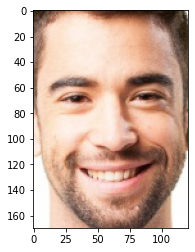

In [29]:
plt.imshow(cv.cvtColor(test_image,cv.COLOR_BGR2RGB))

In [30]:
#applying necassary transformations to test_image before feeding into network
test_image = cv.resize(test_image, (150,150))
test_image = np.expand_dims(test_image,axis = 0)   #need 4th dimension
test_image = test_image/255.0

In [31]:
prediction = cnn.predict(test_image)

In [32]:
prediction

array([[0.9882637 , 0.01266435]], dtype=float32)

In [33]:
test_image2 = cv.imread('gender_dataset_face/woman/face_0.jpg')

In [34]:
gray = cv.cvtColor(test_image2, cv.COLOR_BGR2GRAY)

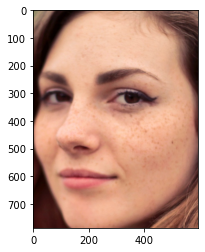

In [35]:
plt.imshow(cv.cvtColor(test_image2,cv.COLOR_BGR2RGB))

In [36]:
#applying necassary transformations to test_image before feeding into network
test_image2 = cv.resize(test_image2, (150,150))
test_image2 = np.expand_dims(test_image2,axis = 0)   #need 4th dimension
test_image2 = test_image2/255.0

In [37]:
prediction2 = cnn.predict(test_image2)

In [38]:
prediction2

array([[0.00687933, 0.99319386]], dtype=float32)

In [39]:
import cvlib #for using .detect_face

# open webcam
webcam = cv.VideoCapture(0)
    
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cvlib.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv.resize(face_crop, (150,150))
        face_crop = face_crop / 255.0
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = cnn.predict(face_crop)[0] # cnn.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv.putText(frame, label, (startX, Y),  cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # display output
    cv.imshow("gender detection", frame)

    # press "Q" to stop
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv.destroyAllWindows()